# Exploratory Data Analysis

In this notebook we:

1. Load in the breast cancer dataset from sklearn
2. Perform some exploratory data analysis
3. Fit some models to get a feel for feature importance and what models the data responds to
4. Save a strongly performing model down as joblib file.

In [1]:
# Load in modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import dump, load
from flaml import AutoML
import warnings
import logging
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
# Read in data
data = load_breast_cancer(as_frame=True)
df = data['data']
df['label'] = pd.Categorical(np.where(data.target == 0, 'malignant', 'benign'))
print("Data shape: ", df.shape)
df.info()

Data shape:  (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   mean radius              569 non-null    float64 
 1   mean texture             569 non-null    float64 
 2   mean perimeter           569 non-null    float64 
 3   mean area                569 non-null    float64 
 4   mean smoothness          569 non-null    float64 
 5   mean compactness         569 non-null    float64 
 6   mean concavity           569 non-null    float64 
 7   mean concave points      569 non-null    float64 
 8   mean symmetry            569 non-null    float64 
 9   mean fractal dimension   569 non-null    float64 
 10  radius error             569 non-null    float64 
 11  texture error            569 non-null    float64 
 12  perimeter error          569 non-null    float64 
 13  area error               569 non-null    f

In [4]:
# View first 5 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [8]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [9]:
# train test split, stratified by label
train_df, test_df = train_test_split(df, test_size=0.25, stratify=df.label, random_state=123)
train_df.to_csv('data/train.csv')
test_df.to_csv('data/test.csv')

Train shape: (426, 31) Test shape: (143, 31)


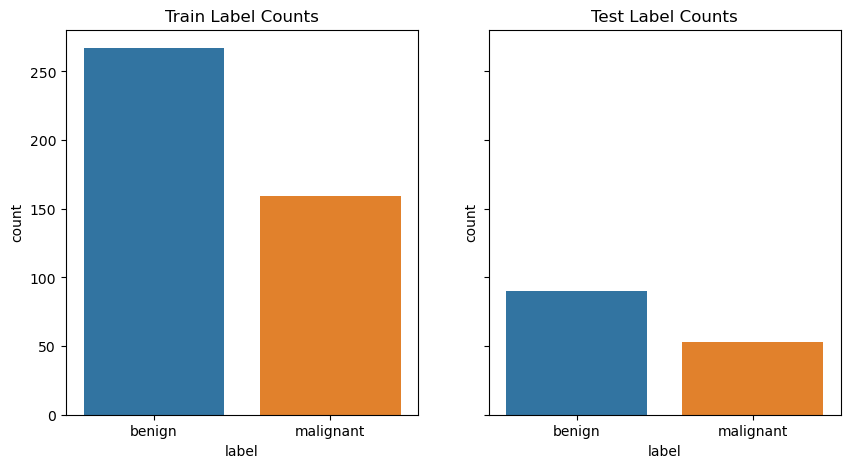

In [9]:
# view label split by malign and benign for both train and test (check stratified split worked)
print("Train shape:", train_df.shape, "Test shape:", test_df.shape)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10,5), sharey=True)
sns.countplot(data = train_df, x ='label', ax=ax0).set(title='Train Label Counts')
sns.countplot(data = test_df, x ='label', ax=ax1).set(title='Test Label Counts')
plt.show()


,count,mean,std,min,10%,25%,50%,75%,90%,max,kurtosis
mean radius,426.0,14.101993,3.473102,6.981000,10.275000,11.682500,13.495000,15.725000,19.200000,28.11000,0.845522
mean texture,426.0,19.191972,4.297701,9.710000,13.915000,16.070000,18.785000,21.877500,25.100000,33.56000,0.758319
mean perimeter,426.0,91.794531,23.936264,43.790000,66.025000,74.842500,87.200000,103.275000,127.700000,188.50000,0.972214
mean area,426.0,651.359859,345.211874,143.500000,322.900000,419.100000,561.150000,765.375000,1150.000000,2499.00000,3.652303
mean smoothness,426.0,0.096396,0.013966,0.064290,0.079890,0.086130,0.095150,0.105250,0.114950,0.16340,0.855975
mean compactness,426.0,0.104213,0.053071,0.023440,0.050230,0.063732,0.091705,0.129825,0.176650,0.31140,1.650130
mean concavity,426.0,0.087386,0.079645,0.000000,0.014335,0.029545,0.058770,0.121450,0.197750,0.42680,1.998638
mean concave points,426.0,0.048595,0.038718,0.000000,0.011445,0.020325,0.032715,0.070403,0.098585,0.20120,1.066556
mean symmetry,426.0,0.181035,0.027453,0.106000,0.149500,0.161500,0.178950,0.195700,0.215450,0.27430,1.287933
mean fractal dimension,426.0,0.062726,0.007068,0.049960,0.055255,0.057438,0.061510,0.066047,0.072375,0.09575,3.005892


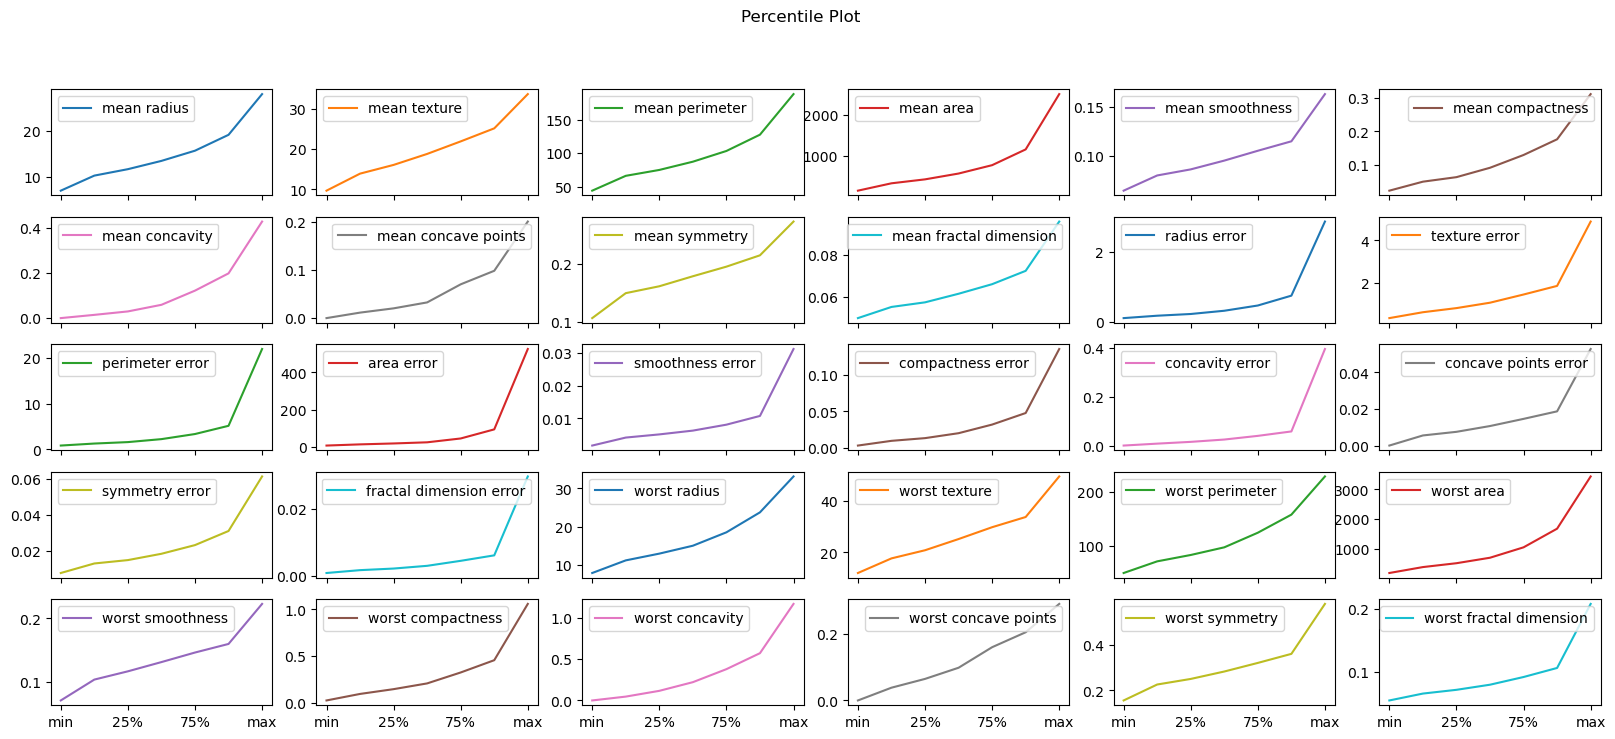

In [10]:
# view summary statistics and plot percentiles for each column. Kurtosis + percentile plots give us an idea of which distributions are higly non-normal
# these look to be radius_error, area_error, concavity_error and fractal_dimension_error.
# extremely non-normal data may cause non-tree methods to perfrom badly
# looking at the ratio of the max to the 90th are not too bad however.
summary_df = train_df.describe(percentiles=(0.1, 0.25, 0.5, 0.75, 0.9))
summary_df.loc['kurtosis'] = df.kurtosis(axis=0, numeric_only=True)
summary_df.loc[['min', '10%', '25%', '50%', '75%', '90%', 'max'],:].plot(subplots=True, layout = (5,6), sharex=True, figsize = (20,8), title = 'Percentile Plot')
summary_df.transpose()

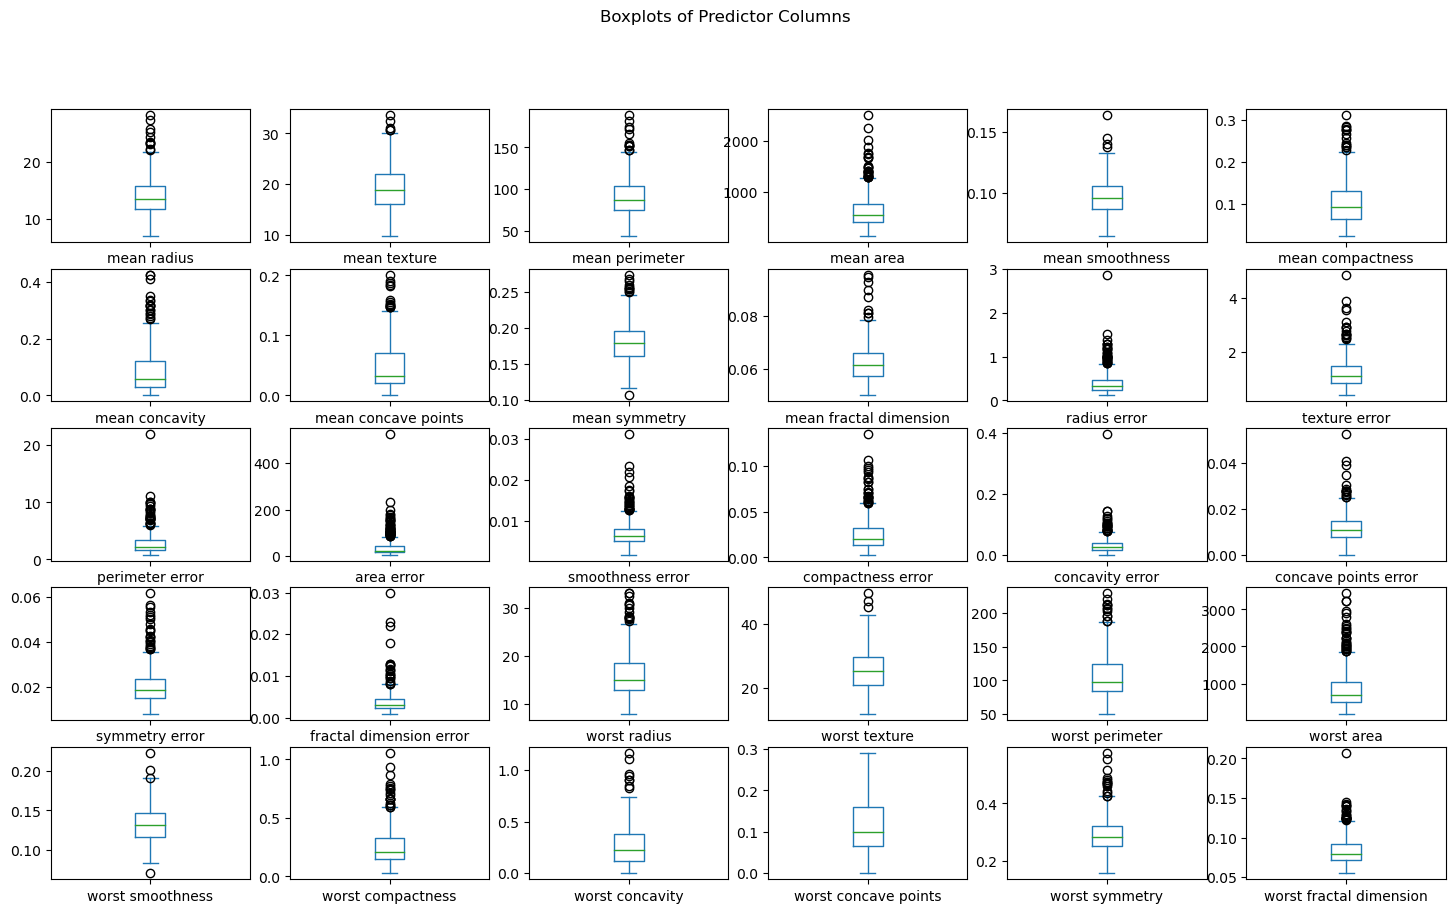

In [11]:
# boxplots are all alternative outlier check, but harder to interpret, in my opinion
train_df.plot(subplots=True, kind='box', layout = (5,6), figsize = (18,10), title = 'Boxplots of Predictor Columns')
plt.show()

/tmp/ipykernel_16600/296169045.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = train_df.corr()


Summary Statistics of Predictor Correlations:


count    435.000000
mean       0.369572
std        0.298662
min       -0.311473
10%       -0.025493
25%        0.162586
50%        0.343672
75%        0.572760
90%        0.790025
max        0.997811
dtype: float64

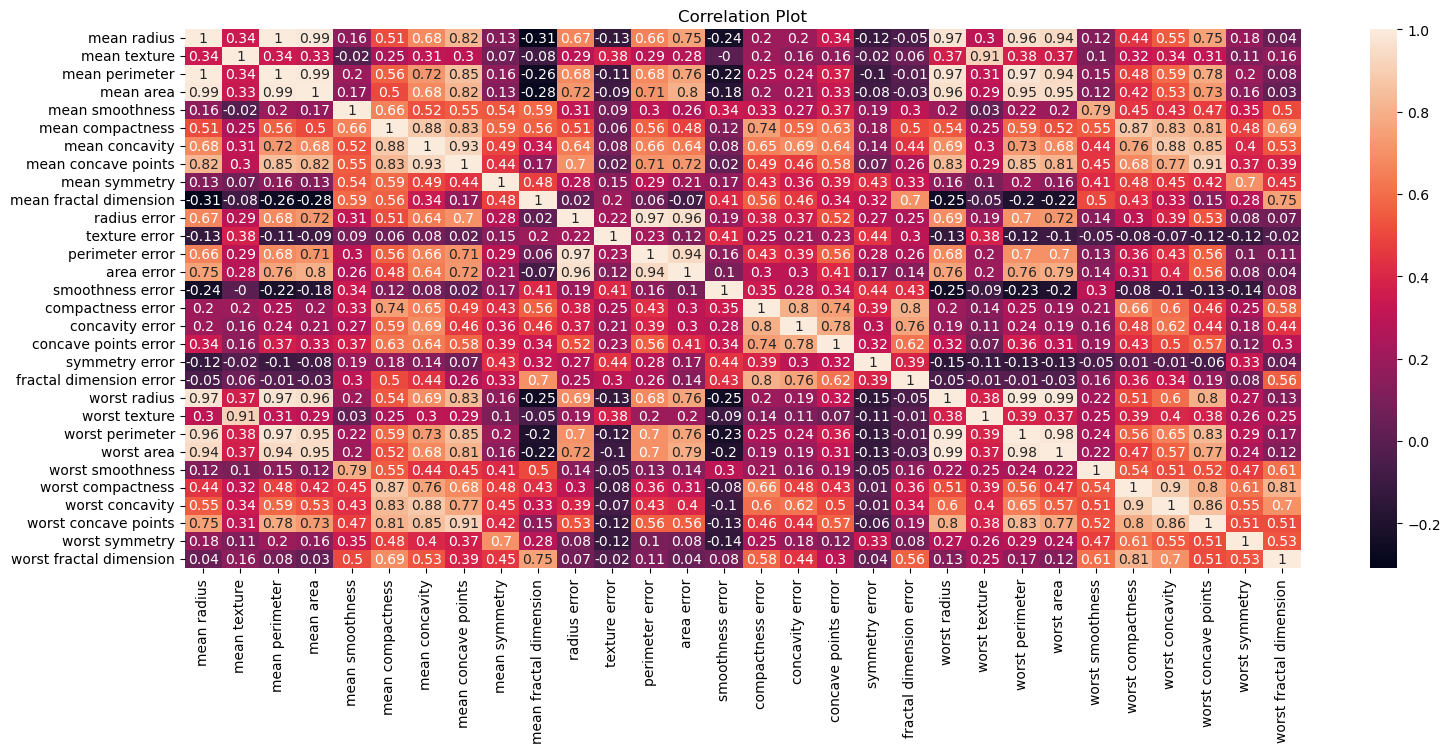

In [12]:
# plot the correlation heat map, percentiles indicate the emprical distribution for correlations (diagonal excluded)
# e.g. 10% of correlations are over 80% and the largest non correlation is 99.8%
plt.figure(figsize = (18,7))
corrs = train_df.corr(numeric_only=True)
sns.heatmap(corrs.round(2), annot=True).set(title='Correlation Plot')
print('Summary Statistics of Predictor Correlations:')
non_diag_corrs = corrs.values[np.triu_indices(corrs.shape[0], k = 1)]
pd.Series(non_diag_corrs).describe(percentiles=(0.1, 0.25, 0.5, 0.75, 0.9))

Train Report:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       267
   malignant       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Test Report:
              precision    recall  f1-score   support

      benign       0.98      0.96      0.97        90
   malignant       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



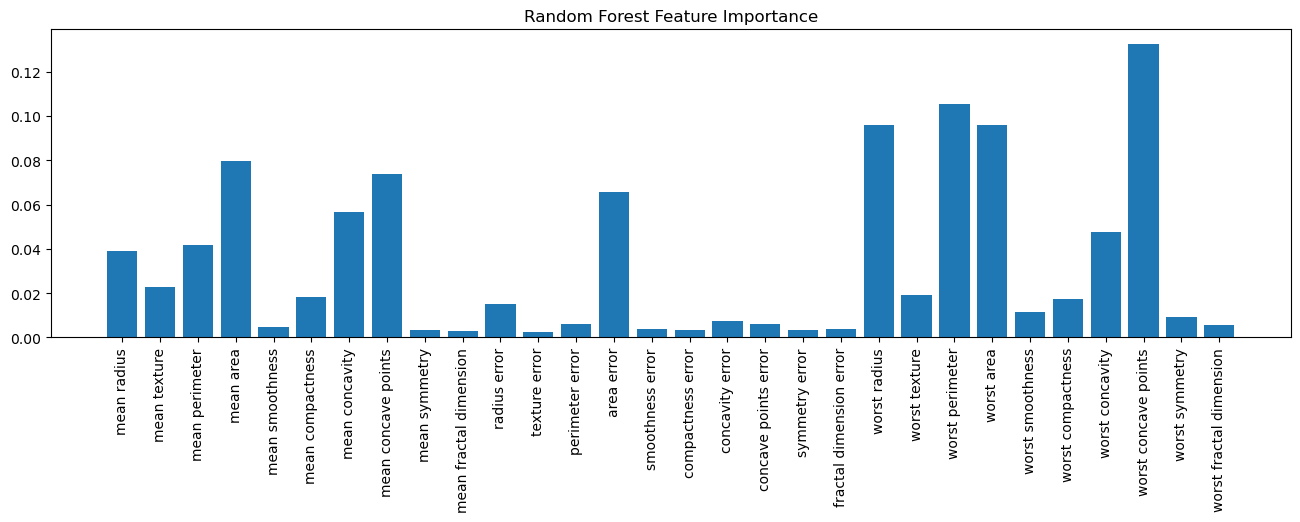

In [13]:
#lets fit a random forest and pull out feature importances
X_train, y_train = train_df.drop('label', axis=1), train_df['label']
X_test, y_test = test_df.drop('label', axis=1), test_df['label']
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Train Report:')
print(classification_report(y_train, rf.predict(X_train)))
print('Test Report:')
print(classification_report(y_test, rf.predict(X_test)))
plt.figure(figsize = (16,4))
plt.bar(rf.feature_names_in_, height = rf.feature_importances_,)
plt.xticks(rotation = 90)
plt.title('Random Forest Feature Importance')
plt.show()

Train Report:
              precision    recall  f1-score   support

      benign       0.99      1.00      0.99       267
   malignant       0.99      0.99      0.99       159

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426

Test Report:
              precision    recall  f1-score   support

      benign       0.98      0.94      0.96        90
   malignant       0.91      0.96      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



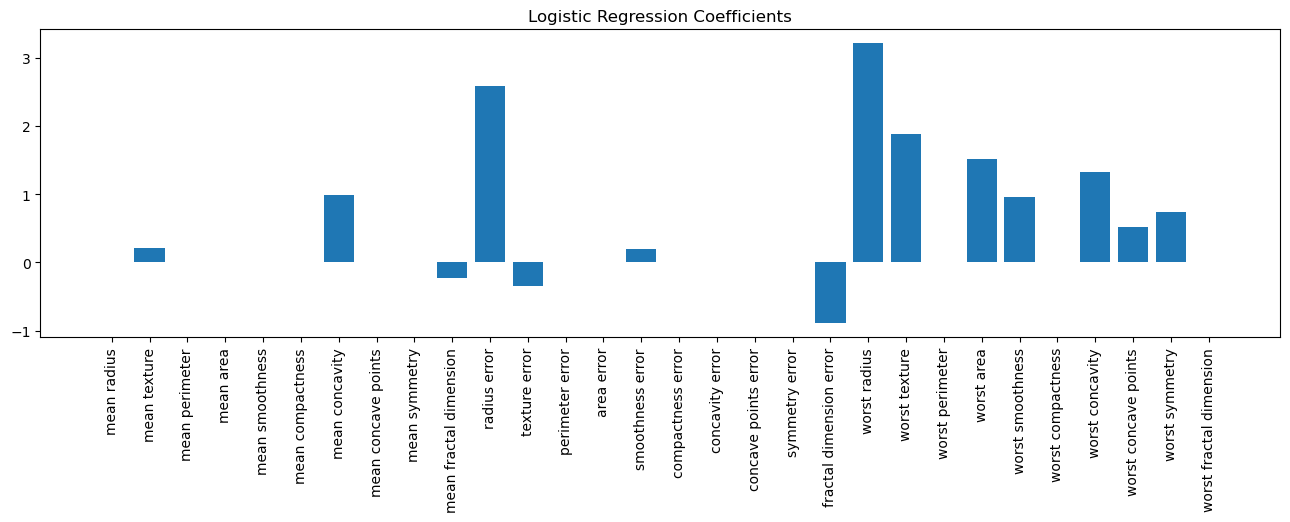

In [14]:
# now lets try a logistic regression with an l1 term. This causes the model to choose a small subset of the features to fit to
# this is a good indicator of feature importance
# this accuracy is still strong here, indicating the models only require a small subset of features in the dataset
sc = StandardScaler()
lr = LogisticRegression(penalty='l1', C=1, solver='liblinear')
pl = Pipeline(steps=[("scaler", sc), ("logistic_regression", lr)])
pl.fit(X_train, y_train)
print('Train Report:')
print(classification_report(y_train, pl.predict(X_train)))
print('Test Report:')
print(classification_report(y_test, pl.predict(X_test)))
plt.figure(figsize = (16,4))
plt.bar(X_train.columns, height = lr.coef_[0])
plt.xticks(rotation = 90)
plt.title(f'Logistic Regression Coefficients')
plt.show()

In [20]:
# lets now try an auto ml approach (FLAML) to check whether we are missing some very strong performing model type
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    automl = AutoML()
    automl.fit(X_train, y_train, task="classification", time_budget=60, verbose=0)

In [16]:
# the best perfroming model here is not much stronger than the logistic regression or random forest
print('Best Machine Learning Algorithm:', automl.best_estimator)
print('Best hyperparmeter configuration:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
print('Train Report:')
print(classification_report(y_train, automl.predict(X_train)))
print('Test Report:')
print(classification_report(y_test, automl.predict(X_test)))

Best Machine Learning Algorithm: extra_tree
Best hyperparmeter configuration: {'n_estimators': 18, 'max_features': 0.28226546428832383, 'max_leaves': 39, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9969
Training duration of best run: 0.04509 s
Train Report:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       267
   malignant       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Test Report:
              precision    recall  f1-score   support

      benign       0.98      0.97      0.97        90
   malignant       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [17]:
# lets stick with the random forest and save it down
dump(rf, 'model.joblib') 

# load model back in to check it works
pl = load('model.joblib') 
print('Test Report:')
print(classification_report(y_test, pl.predict(X_test)))

Test Report:
              precision    recall  f1-score   support

      benign       0.98      0.96      0.97        90
   malignant       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [18]:
# sample predicton for use by the app:
test_df.iloc[:3,:-1].to_json('sample_predictions.json')